In [ ]:
# importing basic libraries
import numpy as np 
import pandas as pd

# for data visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for Interactive shells


# setting up the pipchart size and background
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

In [ ]:
data=pd.read_csv('Modified_movie_metadata.csv')

In [ ]:
data.info()

In [ ]:
# problem statements
# perform analsis and basic recommendations based on similar genres
#  and movies which users prefer

# profitablity of movies
#language based gross analysis
#comparison of gross and profit for different genres
#recommendation system based on actors, movies,genres

#helps to understand correaltion between these factors

In [ ]:
#Profitablity of movies

In [ ]:
#convert gross and budget to million $ to make analysis
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [ ]:
#creating profit column
data['Profit'] = data['gross'] - data['budget']

## TOP TEN MOVIES ACCORDING TO PROFITS

In [ ]:
data[['Profit','movie_title']].sort_values(by = 'Profit',ascending = False).head(10)

In [ ]:
# Movies by language in dataset
data['language'].value_counts()

In [ ]:
# Most of the movies are in English Movies
# creating a function to keep only two language 'english' and 'foreign'

def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
#applying language function in language column
data['language'] = data['language'].apply(language)

#checking value
data['language'].value_counts()

In [ ]:
data['duration'].value_counts()

In [ ]:
# function for short and long duration movies
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
# applying in duration column
data['duration'] = data['duration'].apply(duration)

#checking
data['duration'].value_counts()

In [ ]:
# genres
data['genres'].value_counts()

In [ ]:
data['genres'].str.split('|')[0]

In [ ]:
# a movie can have so many genres so lets keep four genres
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])
#in case movie doesnot have more than one genres than assign same genres to other column
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])
#checking first 5 row
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

## Data Visualization

### social media popularity

   index                          movie_title  Social_Media_Popularity
0      9  Batman v Superman: Dawn of Justice               1599.794424
1    145                        Ghostbusters               1076.336425
2   1478                        Ghostbusters               1075.827482
3     93                        Interstellar               1024.560802
4   2697               10 Days in a Madhouse                828.025478
5    892                      Into the Woods                692.937200
6     71                       Suicide Squad                652.816996
7   1118                Fifty Shades of Grey                624.306881
8    104                            Warcraft                622.790277
9     89        Independence Day: Resurgence                599.274128


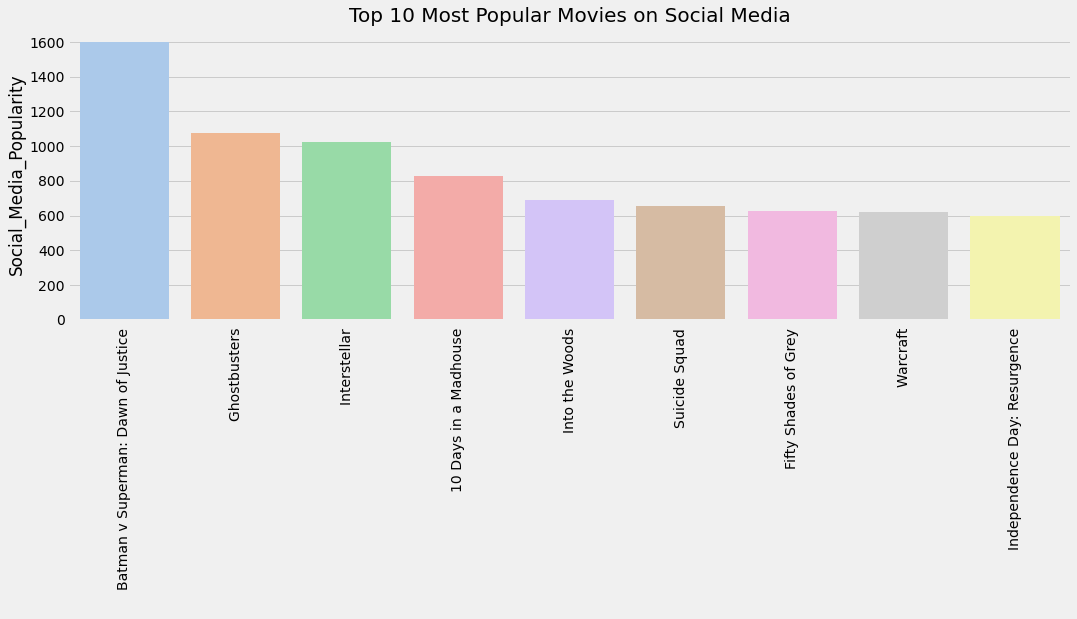

In [31]:
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)
sns.barplot(x="movie_title", y="Social_Media_Popularity", palette = 'pastel',data = x)
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

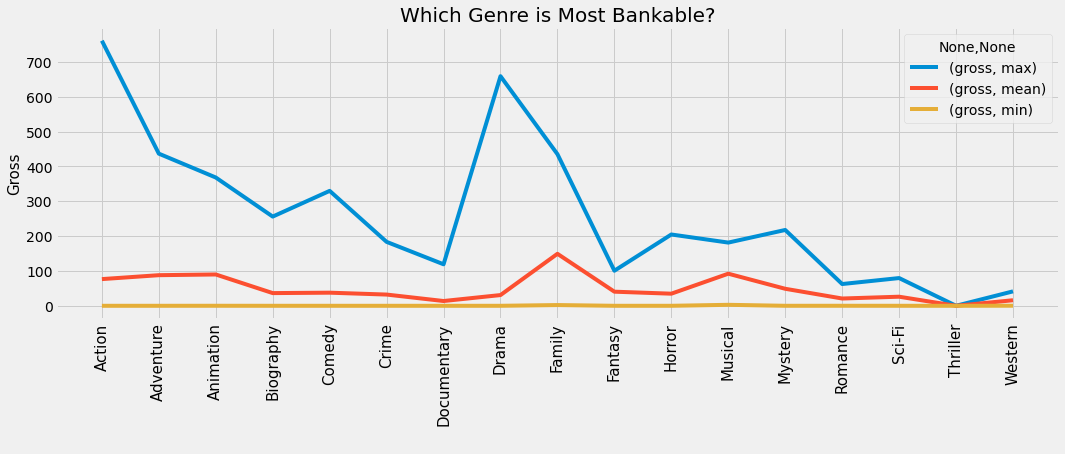

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
482,Adventure,The Lion King,422.783777
494,Animation,Despicable Me 2,368.049635
1318,Biography,The Blind Side,255.950375
787,Comedy,Forrest Gump,329.691196
3015,Crime,The Godfather,134.821952
3104,Documentary,Fahrenheit 9/11,119.078393
25,Drama,Titanic,658.672302
2747,Family,E.T. the Extra-Terrestrial,434.949459
2258,Fantasy,The Others,96.471845


In [29]:
# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line')
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

## Successfull years interms of year

Most Profitable Years in Box Office


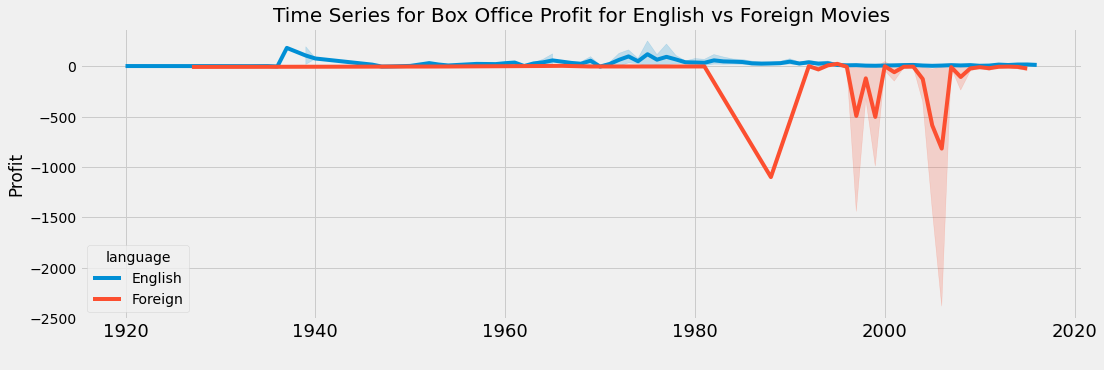

Movies that Made Huge Losses


,movie_title,language,Profit
2135,Princess Mononoke,Foreign,-2397.701809
2146,Steamboy,Foreign,-2127.109510
2677,The Host,Foreign,-12213.298588
2692,Fateless,Foreign,-2499.804112
3281,Lady Vengeance,Foreign,-4199.788333


In [38]:
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Blues'))

# lets plot them
sns.lineplot(x="title_year", y="Profit", hue = data['language'], data = data)
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'gray'))

Top 5 movies of Long Duration


,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
28,Jurassic World,Long,652.177271,502.177271
25,Titanic,Long,658.672302,458.672302
2703,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
16,The Avengers,Long,623.279547,403.279547


Top 5 movies of Short Duration


,movie_title,duration,gross,Profit
2747,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
482,The Lion King,Short,422.783777,377.783777
767,Deadpool,Short,363.024263,305.024263
494,Despicable Me 2,Short,368.049635,292.049635
324,Finding Nemo,Short,380.838870,286.838870


Text(0.5, 1.0, 'Gross Comparison')

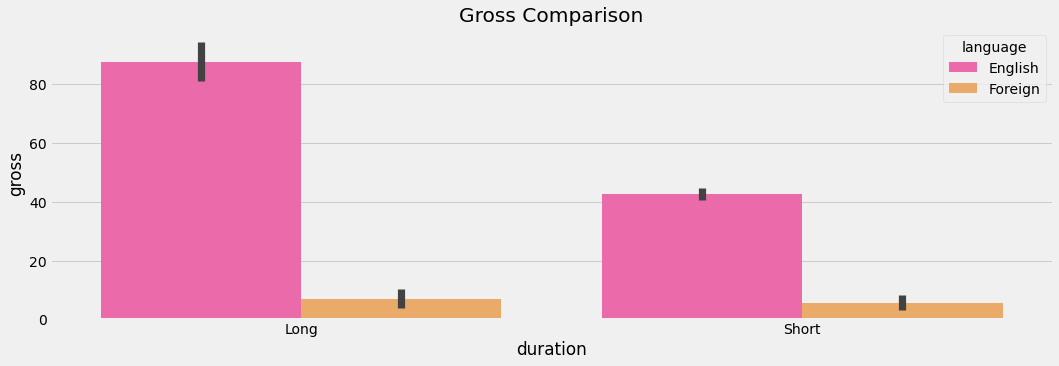

In [41]:
print("Top 5 movies of Long Duration")
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
print("Top 5 movies of Short Duration")
display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

sns.barplot(x="duration", y="gross", hue = data['language'], palette = 'spring',data=data)
plt.title('Gross Comparison')

### From this conclusion , we came to know that duration is important factor for finance of movie as long duration has more profitable chance

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1795  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3113  The Usual Suspects          8.6


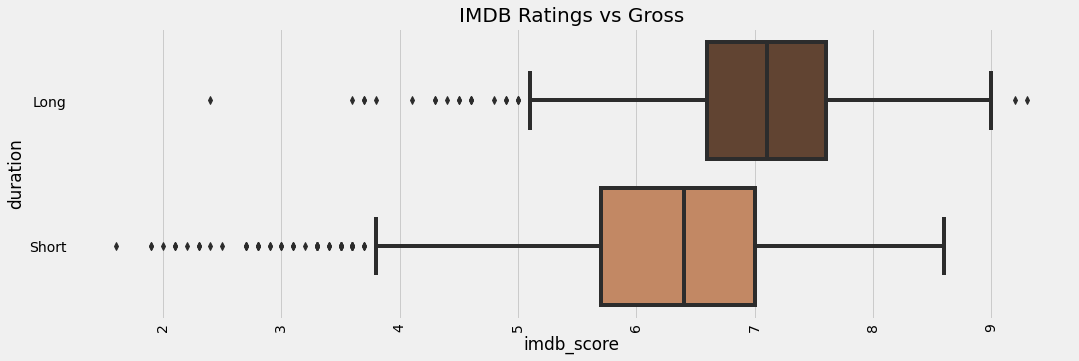

In [44]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

sns.boxplot(x="imdb_score", y="duration", palette = 'copper',data = data)
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [45]:
## conclusion, Long duration movies have far more better imdb rating than short duration movies

In [46]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [50]:
query_actors('Chris Hemsworth')

,movie_title,budget,gross,title_year,genres,language,imdb_score
7,Avengers: Age of Ultron,250.0,458.991599,2015,Action|Adventure|Sci-Fi,English,7.5
16,The Avengers,220.0,623.279547,2012,Action|Adventure|Sci-Fi,English,8.1
79,Snow White and the Huntsman,170.0,155.111815,2012,Action|Adventure|Drama|Fantasy,English,6.1
123,Thor: The Dark World,170.0,206.360018,2013,Action|Adventure|Fantasy,English,7.1
126,Thor,150.0,181.015141,2011,Action|Adventure|Fantasy,English,7.0
155,Star Trek,150.0,257.704099,2009,Action|Adventure|Sci-Fi,English,8.0
233,The Huntsman: Winter's War,115.0,47.952020,2016,Action|Adventure|Drama|Fantasy,English,6.1
306,In the Heart of the Sea,100.0,24.985612,2015,Action|Adventure|Biography|Drama|History|Thriller,English,7.0
593,Blackhat,70.0,7.097125,2015,Action|Crime|Drama|Mystery|Thriller,English,5.4
1289,Rush,38.0,26.903709,2013,Action|Biography|Drama|Sport,English,8.1


In [49]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
    
actors_report('Chris Hemsworth')

Time: 2009 2016
Max Gross : 623.28 Millions
Avg Gross : 150.42 Millions
Min Gross : 0.05 Millions
Number of 100 Million Movies : 6
Avg IMDB Score : 6.86
Most Common Genres:
 Action       10
Adventure     2
Fantasy       1
Comedy        1
Name: Genre1, dtype: int64


In [53]:
# compare chris hemsworth, dwayne jhonson and Tom Hardy

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Chris Hemsworth")
display(critically_acclaimed_actors('Chris Hemsworth'))

print("Number of Critics Reviews for Christian Bale")
display(critically_acclaimed_actors('Christian Bale'))

print("Number of Critics Reviews for Tom Hardy")
display(critically_acclaimed_actors('Tom Hardy'))

Number of Critics Reviews for Chris Hemsworth


5473

Number of Critics Reviews for Christian Bale


7909

Number of Critics Reviews for Tom Hardy


4270

In [54]:
pd.set_option('max_rows', 3000)

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][[ 'title_year','movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'Profit',
                                       'imdb_score',
                                    ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [55]:
pd.set_option('max_rows', 30000)

@interact
def show_articles_more_than(column=['budget','gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

# Recommending Movie based on Language

In [56]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)


In [57]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
3606,Foreign,"The Good, the Bad and the Ugly",8.9
3377,Foreign,City of God,8.7
3732,Foreign,Seven Samurai,8.7
2169,Foreign,Spirited Away,8.6
3806,Foreign,Children of Heaven,8.5
3495,Foreign,The Lives of Others,8.5
3325,Foreign,Samsara,8.5
3683,Foreign,A Separation,8.4
1249,Foreign,Baahubali: The Beginning,8.4
2660,Foreign,Das Boot,8.4


# Recommending Movie Based on 
 # Actors

In [58]:

def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [62]:
recommend_movies_on_actors('Tom Hardy')

,movie_title,imdb_score
94,Inception,8.8
3,The Dark Knight Rises,8.5
1829,Warrior,8.2
124,Mad Max: Fury Road,8.1
173,The Revenant,8.1
3091,Layer Cake,7.4
2240,RocknRolla,7.3
1821,Legend,7.0
737,Star Trek: Nemesis,6.4
983,Child 44,6.4


# recommending movies in similar genres

In [66]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [67]:
# convert this data into boolean so that we can perform calculations
genres = x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,John Carter,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
#set these movie titles as index of the data
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
John Carter,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [76]:
recommendation_genres('Family')

Animation    0.567989
Fantasy      0.343897
Adventure    0.334176
dtype: float64

# Recommending similar Movies

In [77]:
 #make a sparse matrix to recommend the movies

x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,Breaking Upwards,Pink Flamingos,Clean,The Circle,The Cure,Primer,Cavite,El Mariachi,Newlyweds,My Date with Drew
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [78]:
#making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [81]:
recommendation_movie('Inception')

movie_title
Star Trek: Insurrection                    1.0
Serenity                                   1.0
The 5th Wave                               1.0
Waterworld                                 1.0
G.I. Joe: The Rise of Cobra                1.0
Star Trek: Nemesis                         1.0
Inception                                  1.0
Mad Max 2: The Road Warrior                1.0
Moonraker                                  1.0
Star Trek V: The Final Frontier            1.0
Mad Max: Fury Road                         1.0
Star Trek VI: The Undiscovered Country     1.0
Armageddon                                 1.0
Stealth                                    1.0
Predators                                  1.0
G.I. Joe: Retaliation                      1.0
I Am Number Four                           1.0
The Day After Tomorrow                     1.0
Fantastic 4: Rise of the Silver Surfer     1.0
Jumper                                     1.0
dtype: float64